In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
import datetime
import operator
%matplotlib inline

In [3]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [4]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126


In [6]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703


In [7]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/18/21', '10/19/21', '10/20/21', '10/21/21', '10/22/21', '10/23/21',
       '10/24/21', '10/25/21', '10/26/21', '10/27/21'],
      dtype='object', length=649)

In [9]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,0,0,0,0,0,0,0,0,0,0,...,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124
1,0,0,0,0,0,0,0,0,0,0,...,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282
2,0,0,0,0,0,0,0,0,0,0,...,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069
3,0,0,0,0,0,0,0,0,0,0,...,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462
4,0,0,0,0,0,0,0,0,0,0,...,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126


In [10]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
230,0,1,3,3,4,5,7,7,10,13,...,150731,154725,158587,162026,165663,169261,172644,175818,179095,184419


In [11]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,0,0,0,0,0,0,0,0,0,0,...,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266
1,0,0,0,0,0,0,0,0,0,0,...,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893
2,0,0,0,0,0,0,0,0,0,0,...,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703


In [12]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(244999707,
 4971588,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  958982,
  1042008,
  1126208,
  1185351,
  1256187,
  1330136,
  1399770,
  1483065,
  1570050,
  1655370,
  1729757,
  1849354,
  1920407,
  2004274,
  2082496,
  2178189,
  2266231,
  2343419,
  2420194,
  2495741,
  2571745,
  2653236,
  2737234,
  2821349,
  2903700,
  2975167,
  3045416,
  3121220,
  3198418,
  3281704,
  

In [36]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [16]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156124
 1      183282
 2      206069
 3       15462
 4       64126
         ...  
 274    900585
 275    452272
 276      9728
 277    209657
 278    132808
 Name: 10/27/21, Length: 279, dtype: int64,
 0       7266
 1       2893
 2       5904
 3        130
 4       1703
        ...  
 274    21856
 275     4651
 276     1868
 277     3660
 278     4675
 Name: 10/27/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 10/27/21, Length: 264, dtype: int64)

In [19]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

<b>Polynomial Regression</b>

In [44]:
len(days_since_1_22)

645

In [37]:
days_to_skip = 529
X_train_sg_confirmed, X_test_sg_confirmed, y_atrain_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.3, random_state= 0 )

In [38]:
poly = PolynomialFeatures(degree = 2)
x_train_poly, x_test_poly = poly.fit_transform(X_train_sg_confirmed), poly.fit_transform(X_test_sg_confirmed)

polyReg = linear_model.LinearRegression()
poly_model = polyReg.fit(x_train_poly,y_train_sg_confirmed)
coef = poly_model.coef_
intercept = poly_model.intercept_
coef

array([[    0.        , 72110.80841691,   545.7457843 ]])

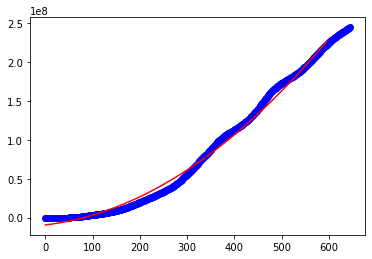

In [48]:

x_axis = np.arange(0, 595, 0.1)
# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2+ coef[0][3] * x_axis**3 
response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2

# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2 + coef[0][3] * x_axis**3  + coef[0][4] * x_axis**4

plt.scatter(days_since_1_22, world_cases, color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [46]:
prediction = poly_model.predict(x_test_poly)

print(r2_score(prediction, y_test_sg_confirmed))
print('MAE:', mean_absolute_error(prediction, y_test_sg_confirmed))
print('MSE:',mean_squared_error(prediction, y_test_sg_confirmed))
for i in future_forecast[-10:]:
    print(poly_model.predict(poly.fit_transform([i])))

0.9921951965096995
MAE: 6504117.928359474
MSE: 55329842734730.34
[[2.64142962e+08]]
[[2.64919631e+08]]
[[2.65697391e+08]]
[[2.66476242e+08]]
[[2.67256186e+08]]
[[2.6803722e+08]]
[[2.68819346e+08]]
[[2.69602564e+08]]
[[2.70386873e+08]]
[[2.71172273e+08]]


<b>MLP</b>

In [49]:
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.3)
mlp = MLPClassifier(max_iter=698, activation='relu', hidden_layer_sizes= (32,17), solver="adam",epsilon=1,shuffle=False,learning_rate_init=0.001,batch_size=5)#tried multiple hyper parameter but still not result 
mlp

MLPClassifier(batch_size=5, epsilon=1, hidden_layer_sizes=(32, 17),
              max_iter=698, shuffle=False)

In [50]:
mlp_model = mlp.fit(X_train_sg_confirmed,y_train_sg_confirmed.ravel())

In [51]:
pred = mlp_model.predict(X_test_sg_confirmed)
pred

array([  3281704,   3281704,   3281704,   3281704,  46144922, 158391120,
         3281704,   3281704,   3281704, 158391120,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,  11842590,   3281704,
        46144922,   3281704,   3281704,   3281704,   3281704,   3281704,
         3281704,   3281704,   3281704,  16744409,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
       158391120, 122405442,   3281704,   3281704,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,  11842590,   3281704,
        16744409,   3281704,   3281704,  11842590,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
       158391120,   3281704,   3281704,   3281704,   3281704, 158391120,
         3281704,   3281704,   3281704,   3281704,   3281704,   3281704,
         3281704,  11842590,   3281704, 158391120,   3281704,   3281704,
         3281704,   3281704,   3281704,   3281704, 

In [52]:
mlp_model.score(X_test_sg_confirmed,y_test_sg_confirmed)


0.0

In [53]:
mlp_model.predict(future_forecast[-10:])


array([3281704, 3281704, 3281704, 3281704, 3281704, 3281704, 3281704,
       3281704, 3281704, 3281704], dtype=int64)